In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Solving ODEs:
<font size="4">Demonstration of stability/instability of different timestepping (single-step) schemes for ODEs.<br>
Here a simple damped system is used $y'=ay$ with $a=-2$ (which can be adjusted); similar results hold for more complicated ODEs.<br>
Explicit schemes have certain conditions on stability for these types of equations and in general.<br>
Implicit schemes are unconditionally stable for this equation and also in general more stable, but one needs to invert part of the equation to carry out timestepping.<br>
The order of convergence is important if the scheme is stable. RK4 is has the highest convergence (fourth order). If the timestep $h$ is sufficiently small, it will outperform all of the other methods used below.</font>

In [61]:
f = lambda t, u, a: a*u # ODE

# Step size; try different values here
h = 0.2 # 0.1, 0.5, 1.0, 1.2, 2.

#coefficient of y'=ay; you can also use different values here
#if a<0, the solution is exponential decay, if a>0 it is exponential growth
a = -2 

t = np.arange(0, 10 + h, h) # Numerical grid, 
#i.e. discrete times of integration

u0 = 1 # Initial Condition

#Explicit Euler (first order)
u = np.zeros(len(t))
u[0] = u0

for i in range(0, len(t) - 1):
    u[i + 1] = u[i] + h*f(t[i], u[i],a)
    
#Implicit Euler (first order)
ui = np.zeros(len(t))
ui[0] = u0

for i in range(0, len(t) - 1):
    ui[i + 1] = 1/(1-h*a)*ui[i]
    
    
#Heun (explicit, second order)
uh = np.zeros(len(t))
uh[0] = u0

for i in range(0, len(t) - 1):
    uh[i + 1] = uh[i] + h/2*(f(t[i],uh[i],a)+f(t[i+1],uh[i]+h*f(t[i],uh[i],a),a))
    
#Crank-Nicolson (implicit, second order)
uc = np.zeros(len(t))
uc[0] = u0
for i in range(0, len(t) - 1):
    uc[i + 1] = 1/(1-h*a/2)*(uc[i] + h/2*(f(t[i],uc[i],a)))
    
    
#Runge-Kutta 4th order (explicit, fourth order)
uk = np.zeros(len(t))
uk[0] = u0

for i in range(0, len(t) - 1):
    K1=f(t[i],uk[i],a)
    K2=f(t[i]+h/2, uk[i]+h/2*K1,a)
    K3=f(t[i]+h/2, uk[i]+h/2*K2,a) 
    K4=f(t[i]+h, uk[i]+h*K3,a)
    uk[i + 1] = uk[i] + h*(K1/6+K2/3+K3/3+K4/6)

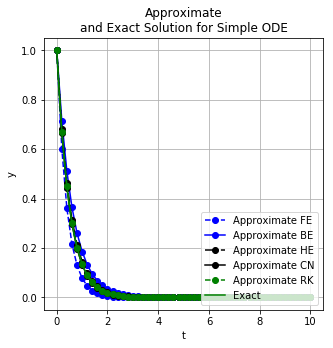

In [62]:
plt.figure(figsize = (5, 5))
#Plotting of approximate solutions of the different methods
plt.plot(t, u, 'bo--', label='Approximate FE')
plt.plot(t, ui, 'bo-', label='Approximate BE')
plt.plot(t, uh, 'ko-.', label='Approximate HE')
plt.plot(t, uc, 'ko-', label='Approximate CN')
plt.plot(t, uk, 'go--', label='Approximate RK')

#Plotting of exact solution (e^(at))
t2=np.arange(0, 10 + 0.1, 0.1)
plt.plot(t2, np.exp(a*t2), 'g', label='Exact')

#Labels
plt.title('Approximate' + '\n'+
'and Exact Solution for Simple ODE')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.legend(loc='lower right')
plt.show()